<a href="https://colab.research.google.com/github/Dantedanger/Diplome/blob/master/MAIN_NEURAL_NETWORK_DIPLOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import tensorflow as tf
import os
from prettytable import PrettyTable
import numpy as np
from keras.models import Model, load_model
from keras.optimizers import SGD
from keras.utils import pad_sequences
from gensim.models import Word2Vec

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

maxWordsCount = 20000
max_text_len = 300

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")

with open('train_data_true.txt', 'r', encoding='utf-8') as f:
    texts_true = f.readlines()
    texts_true[0] = texts_true[0].replace('\ufeff', '')
f.close()
with open('train_data_main.txt', 'r', encoding='utf-8') as f:
    texts_main = f.readlines()
    texts_main[0] = texts_main[0].replace('\ufeff', '')
f.close()
with open('train_data_false.txt', 'r', encoding='utf-8') as f:
    texts_false = f.readlines()
    texts_false[0] = texts_false[0].replace('\ufeff', '')
f.close()
print(texts_main[1])

Искусственный интеллект (ИИ) способен обучаться на основе данных и принимать решения.



In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=60ea94e39cc5c0fb0b3210d14aa6eb5a5c40cad4dc81bda0aabdbf3f44eec211
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+«»"
# stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()
def lemmatize(doc):
    patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+«»"
    stopwords_ru = stopwords.words("russian")
    filters='!-"—#$%&amp;,()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»1234567890'
    for znak in filters:
        if znak in doc:
            doc = doc.replace(znak, "")
    doc = doc.lower()
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru and token != 'с' and token != 'раздел':
            token = token.strip()
            match token:
                case 'ии':
                    token = 'искусственый'
                    tokens.append(token)
                    token = 'интеллект'
                    tokens.append(token)
                case _:
                    token = morph.normal_forms(token)[0]
                    tokens.append(token)
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for i in range (len(texts_main)):
    texts_main[i] = lemmatize(texts_main[i])
    texts_true[i] = lemmatize(texts_true[i])
    texts_false[i] = lemmatize(texts_false[i])
print (texts_main[2])

['искусственый', 'интеллект', 'использоваться', 'медицина', 'диагностика', 'заболевание', 'ранний', 'стадия']


In [ ]:
all_texts = texts_main + texts_true + texts_false

model_vec = Word2Vec(sentences=all_texts, vector_size=1, window=5, min_count=1, workers=4)

data_main = [[model_vec.wv[token][0] for token in doc] for doc in texts_main]
data_pad_main = pad_sequences(data_main, maxlen=max_text_len, dtype='float32')

data_true = [[model_vec.wv[token][0] for token in doc] for doc in texts_true]
data_pad_true = pad_sequences(data_true, maxlen=max_text_len, dtype='float32')

data_false = [[model_vec.wv[token][0] for token in doc] for doc in texts_false]
data_pad_false = pad_sequences(data_false, maxlen=max_text_len, dtype='float32')
print(len(data_pad_main), len(data_pad_true), len(data_pad_false))
maxWordsCount = model_vec.corpus_total_words

print(data_pad_main)

730 730 730
[[0.        0.        0.        ... 1.4883405 1.1887988 1.6233882]
 [0.        0.        0.        ... 3.4730463 1.4548545 4.4736605]
 [0.        0.        0.        ... 1.512699  2.0256643 0.8613204]
 ...
 [0.        0.        0.        ... 3.0987074 2.8975425 3.4614325]
 [0.        0.        0.        ... 3.0987074 2.8975425 3.4614325]
 [0.        0.        0.        ... 3.0987074 2.8975425 3.4614325]]


In [ ]:
X = []
Y = []

for main_row, main_row2, true_row, false_row in zip(data_pad_main, data_pad_main, data_pad_true, data_pad_false):
    X.append([main_row, true_row])
    Y.append([0.8])

    X.append([main_row2, false_row])
    Y.append([0.0])

X = np.array(X)
Y = np.array(Y)
print(X[:, 0], X[:, 1])

[[0.        0.        0.        ... 1.4883405 1.1887988 1.6233882]
 [0.        0.        0.        ... 1.4883405 1.1887988 1.6233882]
 [0.        0.        0.        ... 3.4730463 1.4548545 4.4736605]
 ...
 [0.        0.        0.        ... 3.0987074 2.8975425 3.4614325]
 [0.        0.        0.        ... 3.0987074 2.8975425 3.4614325]
 [0.        0.        0.        ... 3.0987074 2.8975425 3.4614325]] [[ 0.          0.          0.         ...  3.4459412   1.414631
   3.4730463 ]
 [ 0.          0.          0.         ...  3.876468    3.171687
   1.0088003 ]
 [ 0.          0.          0.         ...  4.3639846   3.8104846
   4.4736605 ]
 ...
 [ 0.          0.          0.         ... -0.6720229   4.2276063
   4.2618284 ]
 [ 0.          0.          0.         ...  3.8607266  -0.11923632
   4.01098   ]
 [ 0.          0.          0.         ...  0.4084007   4.782906
   2.9298568 ]]


In [ ]:
import tensorflow as tf
import numpy as np

class Precision(tf.keras.metrics.Metric):
    def __init__(self, name='precision',threshold=0.45,**kwargs):
        super(Precision, self).__init__(name=name,**kwargs)
        self.threshold = threshold
        self.tp = self.add_weight(name='true_positives', initializer='zeros')
        self.fp = self.add_weight(name='false_positives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)

        true_positives = tf.reduce_sum(y_true * y_pred)
        false_positives = tf.reduce_sum(y_pred) - true_positives

        self.tp.assign_add(true_positives)
        self.fp.assign_add(false_positives)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        return precision

    def reset_state(self):
        self.tp.assign(0)
        self.fp.assign(0)

class Recall(tf.keras.metrics.Metric):
    def __init__(self, name='recall',threshold=0.45,**kwargs):
        super(Recall, self).__init__(name=name,**kwargs)
        self.threshold = threshold
        self.tp = self.add_weight(name='true_positives', initializer='zeros')
        self.fn = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)

        true_positives = tf.reduce_sum(y_true * y_pred)
        false_negatives = tf.reduce_sum(y_true) - true_positives

        self.tp.assign_add(true_positives)
        self.fn.assign_add(false_negatives)

    def result(self):
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        return recall

    def reset_state(self):
        self.tp.assign(0)
        self.fn.assign(0)

In [ ]:
import tensorflow as tf

class ROCAUC(tf.keras.metrics.Metric):
    def __init__(self, name='roc_auc', **kwargs):
        super(ROCAUC, self).__init__(name=name, **kwargs)
        self.auc_metric = tf.keras.metrics.AUC(name='auc')

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.auc_metric.update_state(y_true, y_pred, sample_weight)

    def result(self):
        return self.auc_metric.result()

    def reset_state(self):
        self.auc_metric.reset_state()


In [ ]:
# import tensorflow as tf

# class Accuracy(tf.keras.metrics.Metric):
#     def __init__(self, name='accuracy', **kwargs):
#         super(Accuracy, self).__init__(name=name, **kwargs)
#         self.total_correct = self.add_weight(name='total_correct', initializer='zeros')
#         self.total_samples = self.add_weight(name='total_samples', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         y_pred = tf.cast(y_pred >= 0.45, tf.float32)
#         y_true = tf.cast(y_true, tf.float32)
#         values = tf.cast(tf.equal(y_true, y_pred), tf.float32)

#         if sample_weight is not None:
#             sample_weight = tf.cast(sample_weight, tf.float32)
#             values = tf.multiply(values, sample_weight)
#             num_elements = tf.reduce_sum(sample_weight)
#         else:
#             num_elements = tf.cast(tf.size(y_true), tf.float32)

#         self.total_correct.assign_add(tf.reduce_sum(values))
#         self.total_samples.assign_add(num_elements)

#     def result(self):
#         return self.total_correct / self.total_samples

#     def reset_state(self):
#         self.total_correct.assign(0)
#         self.total_samples.assign(0)

In [ ]:
import tensorflow as tf

class Tp(tf.keras.metrics.Metric):
    def __init__(self, name: str = 'true_positives', num_classes: int = 2, threshold: float = 0.45, **kwargs):
        super(Tp, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.num_classes = num_classes
        self.tp = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true: tf.Tensor, y_pred: tf.Tensor, sample_weight: tf.Tensor = None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)
        true_positives = tf.reduce_sum(y_true * y_pred)
        self.tp.assign_add(true_positives)

    def result(self) -> tf.Tensor:
        return self.tp

    def reset_state(self):
        self.tp.assign(0)


class Fp(tf.keras.metrics.Metric):
    def __init__(self, name: str = 'false_positives', num_classes: int = 2, threshold: float = 0.45, **kwargs):
        super(Fp, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.num_classes = num_classes
        self.fp = self.add_weight(name='fp', initializer='zeros')

    def update_state(self, y_true: tf.Tensor, y_pred: tf.Tensor, sample_weight: tf.Tensor = None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)
        false_positives = tf.reduce_sum(y_pred * (1 - y_true))
        self.fp.assign_add(false_positives)

    def result(self) -> tf.Tensor:
        return self.fp

    def reset_state(self):
        self.fp.assign(0)


class Fn(tf.keras.metrics.Metric):
    def __init__(self, name: str = 'false_negatives', num_classes: int = 2, threshold: float = 0.45, **kwargs):
        super(Fn, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.num_classes = num_classes
        self.fn = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true: tf.Tensor, y_pred: tf.Tensor, sample_weight: tf.Tensor = None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)
        false_negatives = tf.reduce_sum((1 - y_pred) * y_true)
        self.fn.assign_add(false_negatives)

    def result(self) -> tf.Tensor:
        return self.fn

    def reset_state(self):
        self.fn.assign(0)



class Tn(tf.keras.metrics.Metric):
    def __init__(self, name: str = 'true_negatives', num_classes: int = 2, threshold: float = 0.45, **kwargs):
        super(Tn, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.num_classes = num_classes
        self.tn = self.add_weight(name='tn', initializer='zeros')

    def update_state(self, y_true: tf.Tensor, y_pred: tf.Tensor, sample_weight: tf.Tensor = None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)

        true_negatives = tf.reduce_sum((1 - y_true) * (1 - y_pred))
        self.tn.assign_add(true_negatives)

    def result(self) -> tf.Tensor:
        return self.tn

    def reset_state(self):
        self.tn.assign(0)

In [ ]:
import tensorflow as tf

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', threshold=0.45, **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.tp = self.add_weight(name='true_positives', initializer='zeros')
        self.fp = self.add_weight(name='false_positives', initializer='zeros')
        self.fn = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)

        true_positives = tf.reduce_sum(y_true * y_pred)
        false_positives = tf.reduce_sum(y_pred) - true_positives
        false_negatives = tf.reduce_sum(y_true) - true_positives

        self.tp.assign_add(true_positives)
        self.fp.assign_add(false_positives)
        self.fn.assign_add(false_negatives)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_state(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

In [ ]:
from keras.callbacks import ModelCheckpoint
os.chdir("/content/drive/MyDrive/Colab Notebooks/third")
checkpoint_f1 = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_f1.keras", monitor="val_f1_score", save_best_only=True, mode="max")
checkpoint_mse = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_mse.keras", monitor="val_loss", save_best_only=True, mode="min")
checkpoint_f1_main = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_f1_main.keras", monitor="f1_score", save_best_only=True, mode="max")
checkpoint_mse_main = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_mse_main.keras", monitor="loss", save_best_only=True, mode="min")
checkpoint_precision = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_prec.keras", monitor="val_precision", save_best_only=True, mode="max")
checkpoint_recall = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_rec.keras", monitor="val_recall", save_best_only=True, mode="max")
checkpoint_precision_main = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_pre.keras", monitor="precision", save_best_only=True, mode="max")
checkpoint_recall_main = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/third/best_model_rec.keras", monitor="recall", save_best_only=True, mode="max")


In [ ]:
from keras.layers import Input, Dot, Dense, Dropout
from keras.optimizers import SGD

# Создание входных слоев
input_main_text1 = Input(shape=(max_text_len,))
input_main_text2 = Input(shape=(max_text_len,))

# Создание слоя Embedding
# embedding_layer = Embedding(maxWordsCount, 128, input_shape=(max_text_len,))
# embedded_main_text = embedding_layer(input_main_text1)
# embedded_related_text = embedding_layer(input_main_text2)

# Создание слоя LSTM для каждой текстовой последовательности

dense_layer_1 = Dense(256, activation='tanh')
main_text1 = dense_layer_1(input_main_text1)
main_text2 = dense_layer_1(input_main_text2)

# dropout_layer = Dropout(0.5)
# main_text1_1 = dropout_layer(main_text1)
# main_text2_1 = dropout_layer(main_text2)

dense_layer_2 = Dense(128, activation='tanh')
main_text1_2 = dense_layer_2(main_text1)
main_text2_2 = dense_layer_2(main_text2)

dropout_layer = Dropout(0.6)
main_text1_1 = dropout_layer(main_text1_2)
main_text2_1 = dropout_layer(main_text2_2)

dense_layer_2 = Dense(64, activation='tanh')
main_text1_2 = dense_layer_2(main_text1_1)
main_text2_2 = dense_layer_2(main_text2_1)


# Вычисление косинусного сходства
cosine_similarity = Dot(axes=1, normalize=True)([main_text1_2, main_text2_2])

# Создание модели
model = Model(inputs=[input_main_text1, input_main_text2], outputs=cosine_similarity)

# Компиляция модели
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=[F1Score(), ROCAUC(), Precision(), Recall(), Tp(), Fp(), Fn(), Tn()])

# Вывод информации о модели
model.summary()

# Обучение модели
from sklearn.model_selection import train_test_split

# Сначала разделим данные на обучающие + валидационные и тестовые
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

# Затем разделим обучающие + валидационные на обучающие и валидационные
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1, random_state=0)

# Обучение модели
history = model.fit([X_train[:, 0], X_train[:, 1]], Y_train, batch_size=32, epochs=400,
                    validation_data=([X_val[:, 0], X_val[:, 1]], Y_val),
                    callbacks=[checkpoint_f1, checkpoint_mse, checkpoint_f1_main,
                               checkpoint_mse_main, checkpoint_precision,
                               checkpoint_recall, checkpoint_precision_main, checkpoint_recall_main])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 256)            │         77,056 │ input_layer_8[0][0],   │
│                           │                        │                │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 128)            │         32,896 │ dense_12[0][0],        │
│                           │                        │                │ dense_12[1][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_13[0][0],        │
│                           │                        │                │ dense_13[1][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 64)             │          8,256 │ dropout_4[0][0],       │
│                           │                        │                │ dropout_4[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_4 (Dot)               │ (None, 1)              │              0 │ dense_14[0][0],        │
│                           │                        │                │ dense_14[1][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 118,208 (461.75 KB)

 Trainable params: 118,208 (461.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - f1_score: 0.2833 - false_negatives: 157.3556 - false_positives: 74.9778 - loss: 0.1852 - precision: 0.4840 - recall: 0.2197 - roc_auc: 0.5495 - true_negatives: 272.5611 - true_positives: 58.4667 - val_f1_score: 0.6188 - val_false_negatives: 0.0000e+00 - val_false_positives: 69.0000 - val_loss: 0.3243 - val_precision: 0.4480 - val_recall: 1.0000 - val_roc_auc: 0.5508 - val_true_negatives: 0.0000e+00 - val_true_positives: 56.0000
Epoch 2/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.4445 - false_negatives: 118.4444 - false_positives: 142.9556 - loss: 0.1666 - precision: 0.4108 - recall: 0.4894 - roc_auc: 0.5656 - true_negatives: 202.2500 - true_positives: 99.7111 - val_f1_score: 0.6222 - val_false_negatives: 0.0000e+00 - val_false_positives: 68.0000 - val_loss: 0.3005 - val_precision: 0.4516 - val_recall: 1.0000 - val_roc_auc: 0.5655 - val_true_negatives: 1.0000 - val_true_positives: 56.0000
Epoch 3/400
35/35 ━━━━━━━━━━━━━

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/third/best_model_f1.keras',
custom_objects={'F1Score': F1Score,'ROCAUC': ROCAUC,'Precision': Precision, 'Recall': Recall,
                'Tp': Tp,'Fp': Fp,'Tn': Tn, 'Fn': Fn})

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Education_list")
files = os.listdir()
col = len(files) + 1
print(files)
a = [[""] * col for i in range(col)]
for n, item1 in enumerate(files):
    with open(item1, 'r', encoding='utf-8') as f:
        main_text = f.readline()
        new_main_text = f.readlines()
        a[n + 1][0] = main_text
    for k, item in enumerate(files):
        if k < n:
            with open(item, 'r', encoding='utf-8') as f1:
                related_text = f1.readline()
                new_related_text = f1.readlines()
                a[0][k + 1] = related_text

            new_new_main_text = lemmatize(new_main_text[0])
            new_new_related_text = lemmatize(new_related_text[0])

            print(new_new_main_text, new_new_related_text, sep="\n")

            two_texts = [new_new_main_text + new_new_related_text]

            # Добавление новых текстов к существующей модели
            model_vec.build_vocab(two_texts, update=True)

            # Переобучение модели на расширенном корпусе данных
            model_vec.train(two_texts, total_examples=model_vec.corpus_count, epochs=model_vec.epochs)

            new_main_sequence = [model_vec.wv[token][0] for token in new_new_main_text]
            new_padded_main_sequence = pad_sequences([new_main_sequence], maxlen=max_text_len, dtype='float32')

            new_related_sequence = [model_vec.wv[token][0] for token in new_new_related_text]
            new_padded_related_sequence = pad_sequences([new_related_sequence], maxlen=max_text_len, dtype='float32')

            new_X = [new_padded_main_sequence, new_padded_related_sequence]
            prediction = model.predict(new_X)

            predicted_label = "+" if prediction[0][0] >= 0.45 else "-"
            a[n + 1][k + 1] = predicted_label
            a[k + 1][n + 1] = predicted_label
            print("", main_text, related_text, predicted_label, prediction[0][0])

            f.close()
            f1.close()
        else:
            break
a[0][col - 1] = a[col - 1][0]

['Б1.Б5_История.txt', 'Б1.Б8_Русский_язык_и_культура_речи.txt', 'Б1.ДВ6.1_Нейрокомпьютерные_системы.txt', 'Б1.Б2_Алгебра_и_аналитическая_геометрия.txt', '03.09.04_Иностранный_яызк.txt']
['язык', 'универсальный', 'знаковый', 'система', 'искусственный', 'знаковый', 'система', 'другой', 'знаковый', 'система', 'использовать', 'человеческий', 'общество', 'сопоставление', 'язык', 'основной', 'функция', 'язык', 'функция', 'язык', 'язык', 'культура', 'роль', 'язык', 'развитие', 'национальный', 'мировой', 'культура', 'усвоение', 'культура', 'каждый', 'член', 'общество', 'связь', 'язык', 'история', 'культура', 'народ', 'русский', 'язык', 'среди', 'язык', 'мир', 'русский', 'язык', 'средство', 'межгосударственный', 'общение', 'русский', 'язык', 'язык', 'восточнославянский', 'подгруппа', 'индоевропейский', 'семья', 'родственный', 'связь', 'другой', 'славянский', 'индоевропейский', 'язык', 'русский', 'язык', 'государственный', 'язык', 'российский', 'федерация', 'нелитературный', 'вариант', 'русск

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
 Б1.Б8 Русский язык и культура речи
 Б1.Б5 История
 + 0.91779333


['определение', 'искусственный', 'нейронный', 'сеть', 'инс', 'введение', 'инс', 'биологический', 'аналогия', 'инс', 'цель', 'задача', 'дисциплина', 'роль', 'место', 'общий', 'система', 'подготовка', 'специалист', 'биологический', 'предпосылка', 'возникновение', 'искусственный', 'нейронный', 'сеть', 'структура', 'человеческий', 'мозг', 'организация', 'память', 'кора', 'человеческий', 'мозг', 'ритм', 'колебание', 'больший', 'нейронный', 'ансамбль', 'биологически', 'правдоподобный', 'модель', 'нейрон', 'модель', 'визуальный', 'восприятие', 'основной', 'понятие', 'инс', 'классификация', 'инс', 'тип', 'функция', 'активация', 'нейрон', 'представление', 'нейронный', 'сеть', 'помощь', 'направить', 'граф', 'архитектура', 'сеть', 'сеть', 'прямой', 'распространение', 'рекуррентный', 'сеть', 'обучение', 'нейронный', 'сеть', 'обучение', 'основать', 'коррекция', 'ошибка', 'обучение', 'основа', 'память', 'обучение', 'хебба', 'математический', 'модель', 'предложить', 'хебб', 'механизм', 'модификация',

['определение', 'искусственный', 'нейронный', 'сеть', 'инс', 'введение', 'инс', 'биологический', 'аналогия', 'инс', 'цель', 'задача', 'дисциплина', 'роль', 'место', 'общий', 'система', 'подготовка', 'специалист', 'биологический', 'предпосылка', 'возникновение', 'искусственный', 'нейронный', 'сеть', 'структура', 'человеческий', 'мозг', 'организация', 'память', 'кора', 'человеческий', 'мозг', 'ритм', 'колебание', 'больший', 'нейронный', 'ансамбль', 'биологически', 'правдоподобный', 'модель', 'нейрон', 'модель', 'визуальный', 'восприятие', 'основной', 'понятие', 'инс', 'классификация', 'инс', 'тип', 'функция', 'активация', 'нейрон', 'представление', 'нейронный', 'сеть', 'помощь', 'направить', 'граф', 'архитектура', 'сеть', 'сеть', 'прямой', 'распространение', 'рекуррентный', 'сеть', 'обучение', 'нейронный', 'сеть', 'обучение', 'основать', 'коррекция', 'ошибка', 'обучение', 'основа', 'память', 'обучение', 'хебба', 'математический', 'модель', 'предложить', 'хебб', 'механизм', 'модификация',

['алгебра', 'матрица', 'система', 'линейный', 'уравнение', 'матрица', 'определитель', 'матрица', 'алгебра', 'матрица', 'определитель', 'матрица', 'вычисление', 'определитель', 'обратный', 'матрица', 'построение', 'обратный', 'матрица', 'общий', 'теория', 'система', 'линейный', 'уравнение', 'система', 'линейный', 'уравнение', 'основной', 'понятие', 'определение', 'квадратный', 'система', 'решение', 'квадратный', 'система', 'помощь', 'обратный', 'матрица', 'метод', 'крамер', 'метод', 'исследование', 'решение', 'произвольный', 'система', 'однородный', 'система', 'линейный', 'уравнение', 'векторный', 'алгебра', 'аналитический', 'геометрия', 'пространство', 'геометрический', 'вектор', 'операция', 'вектор', 'приложение', 'пространство', 'геометрический', 'вектор', 'скалярный', 'произведение', 'вектор', 'векторный', 'произведение', 'вектор', 'геометрический', 'физический', 'смысл', 'свойство', 'смешанный', 'произведение', 'три', 'вектор', 'свойство', 'геометрический', 'смысл', 'приложение', '

['алгебра', 'матрица', 'система', 'линейный', 'уравнение', 'матрица', 'определитель', 'матрица', 'алгебра', 'матрица', 'определитель', 'матрица', 'вычисление', 'определитель', 'обратный', 'матрица', 'построение', 'обратный', 'матрица', 'общий', 'теория', 'система', 'линейный', 'уравнение', 'система', 'линейный', 'уравнение', 'основной', 'понятие', 'определение', 'квадратный', 'система', 'решение', 'квадратный', 'система', 'помощь', 'обратный', 'матрица', 'метод', 'крамер', 'метод', 'исследование', 'решение', 'произвольный', 'система', 'однородный', 'система', 'линейный', 'уравнение', 'векторный', 'алгебра', 'аналитический', 'геометрия', 'пространство', 'геометрический', 'вектор', 'операция', 'вектор', 'приложение', 'пространство', 'геометрический', 'вектор', 'скалярный', 'произведение', 'вектор', 'векторный', 'произведение', 'вектор', 'геометрический', 'физический', 'смысл', 'свойство', 'смешанный', 'произведение', 'три', 'вектор', 'свойство', 'геометрический', 'смысл', 'приложение', '

['алгебра', 'матрица', 'система', 'линейный', 'уравнение', 'матрица', 'определитель', 'матрица', 'алгебра', 'матрица', 'определитель', 'матрица', 'вычисление', 'определитель', 'обратный', 'матрица', 'построение', 'обратный', 'матрица', 'общий', 'теория', 'система', 'линейный', 'уравнение', 'система', 'линейный', 'уравнение', 'основной', 'понятие', 'определение', 'квадратный', 'система', 'решение', 'квадратный', 'система', 'помощь', 'обратный', 'матрица', 'метод', 'крамер', 'метод', 'исследование', 'решение', 'произвольный', 'система', 'однородный', 'система', 'линейный', 'уравнение', 'векторный', 'алгебра', 'аналитический', 'геометрия', 'пространство', 'геометрический', 'вектор', 'операция', 'вектор', 'приложение', 'пространство', 'геометрический', 'вектор', 'скалярный', 'произведение', 'вектор', 'векторный', 'произведение', 'вектор', 'геометрический', 'физический', 'смысл', 'свойство', 'смешанный', 'произведение', 'три', 'вектор', 'свойство', 'геометрический', 'смысл', 'приложение', '

['nice', 'to', 'meet', 'you', 'hello', 'eole', 'of', 'the', 'world', 'содержание', 'языковой', 'материал', 'лексика', 'seech', 'tterns', '“greetings', 'nd', 'rting', 'with', 'eole”', 'знакомство', 'функциональный', 'стиль', 'чтение', 'ознакомительный', 'чтение', 'учебный', 'текст', 'тема', 'монологический', 'высказывание', 'содержание', 'текст', 'пересказ', 'спряжение', 'глагол', 'to', 'hve', 'to', 'be', 'present', 'sile', 'present', 'continuous', 'утвердительный', 'вопросительный', 'отрицательный', 'форма', 'знакомство', 'лексический', 'единица', 'общий', 'порядок', 'существительное', 'образование', 'we', 're', 'fily', 'содержание', 'языковой', 'материал', 'лексика', 'discussing', 'toic', 'bout', 'y', 'fily', 'знакомство', 'разговорнообиходный', 'функциональный', 'стиль', 'чтение', 'аналитический', 'чтение', 'учебный', 'текст', 'лексикограмматический', 'смысловой', 'анализ', 'текст', 'образование', 'множественный', 'число', 'существительное', 'употребление', 'определённый', 'неопредел

['nice', 'to', 'meet', 'you', 'hello', 'eole', 'of', 'the', 'world', 'содержание', 'языковой', 'материал', 'лексика', 'seech', 'tterns', '“greetings', 'nd', 'rting', 'with', 'eole”', 'знакомство', 'функциональный', 'стиль', 'чтение', 'ознакомительный', 'чтение', 'учебный', 'текст', 'тема', 'монологический', 'высказывание', 'содержание', 'текст', 'пересказ', 'спряжение', 'глагол', 'to', 'hve', 'to', 'be', 'present', 'sile', 'present', 'continuous', 'утвердительный', 'вопросительный', 'отрицательный', 'форма', 'знакомство', 'лексический', 'единица', 'общий', 'порядок', 'существительное', 'образование', 'we', 're', 'fily', 'содержание', 'языковой', 'материал', 'лексика', 'discussing', 'toic', 'bout', 'y', 'fily', 'знакомство', 'разговорнообиходный', 'функциональный', 'стиль', 'чтение', 'аналитический', 'чтение', 'учебный', 'текст', 'лексикограмматический', 'смысловой', 'анализ', 'текст', 'образование', 'множественный', 'число', 'существительное', 'употребление', 'определённый', 'неопредел

['nice', 'to', 'meet', 'you', 'hello', 'eole', 'of', 'the', 'world', 'содержание', 'языковой', 'материал', 'лексика', 'seech', 'tterns', '“greetings', 'nd', 'rting', 'with', 'eole”', 'знакомство', 'функциональный', 'стиль', 'чтение', 'ознакомительный', 'чтение', 'учебный', 'текст', 'тема', 'монологический', 'высказывание', 'содержание', 'текст', 'пересказ', 'спряжение', 'глагол', 'to', 'hve', 'to', 'be', 'present', 'sile', 'present', 'continuous', 'утвердительный', 'вопросительный', 'отрицательный', 'форма', 'знакомство', 'лексический', 'единица', 'общий', 'порядок', 'существительное', 'образование', 'we', 're', 'fily', 'содержание', 'языковой', 'материал', 'лексика', 'discussing', 'toic', 'bout', 'y', 'fily', 'знакомство', 'разговорнообиходный', 'функциональный', 'стиль', 'чтение', 'аналитический', 'чтение', 'учебный', 'текст', 'лексикограмматический', 'смысловой', 'анализ', 'текст', 'образование', 'множественный', 'число', 'существительное', 'употребление', 'определённый', 'неопредел

['nice', 'to', 'meet', 'you', 'hello', 'eole', 'of', 'the', 'world', 'содержание', 'языковой', 'материал', 'лексика', 'seech', 'tterns', '“greetings', 'nd', 'rting', 'with', 'eole”', 'знакомство', 'функциональный', 'стиль', 'чтение', 'ознакомительный', 'чтение', 'учебный', 'текст', 'тема', 'монологический', 'высказывание', 'содержание', 'текст', 'пересказ', 'спряжение', 'глагол', 'to', 'hve', 'to', 'be', 'present', 'sile', 'present', 'continuous', 'утвердительный', 'вопросительный', 'отрицательный', 'форма', 'знакомство', 'лексический', 'единица', 'общий', 'порядок', 'существительное', 'образование', 'we', 're', 'fily', 'содержание', 'языковой', 'материал', 'лексика', 'discussing', 'toic', 'bout', 'y', 'fily', 'знакомство', 'разговорнообиходный', 'функциональный', 'стиль', 'чтение', 'аналитический', 'чтение', 'учебный', 'текст', 'лексикограмматический', 'смысловой', 'анализ', 'текст', 'образование', 'множественный', 'число', 'существительное', 'употребление', 'определённый', 'неопредел

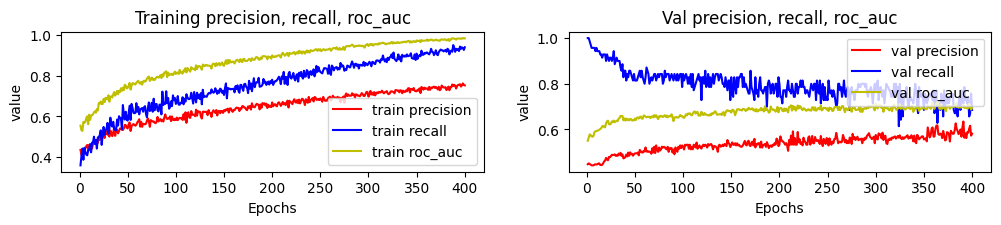

In [ ]:
import matplotlib.pyplot as plt


# Извлечение метрик из истории обучения
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_precision = history.history['precision']
train_recall = history.history['recall']
train_roc_auc = history.history['roc_auc']

val_precision = history.history['val_precision']
val_recall = history.history['val_recall']
val_roc_auc = history.history['val_roc_auc']

f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']



# Построение графика
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))

# График точности (в данном случае)
plt.subplot(2, 2, 1)
plt.plot(epochs, train_precision, 'r', label='train precision')
plt.plot(epochs, train_recall, 'b', label='train recall')
plt.plot(epochs, train_roc_auc, 'y', label='train roc_auc')
plt.title('Training precision, recall, roc_auc')
plt.xlabel('Epochs')
plt.ylabel('value')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, val_precision, 'r', label='val precision')
plt.plot(epochs, val_recall, 'b', label='val recall')
plt.plot(epochs, val_roc_auc, 'y', label='val roc_auc')
plt.title('Val precision, recall, roc_auc')
plt.xlabel('Epochs')
plt.ylabel('value')
plt.legend()


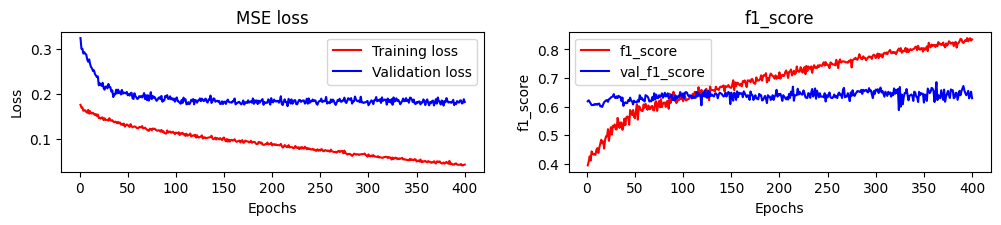

In [ ]:
# График точности (в данном случае)
plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('MSE loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, f1_score, 'r', label='f1_score')
plt.plot(epochs, val_f1_score, 'b', label='val_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()


plt.show()

In [ ]:
print (history.history['tp_2'])

In [ ]:
table = PrettyTable()
for row in a:
    table.add_row(row, divider=True)
table.header = False
print(table)

+-----------------------------------------+---------------+------------------------------------+--------------------------------------+-----------------------------------------+---------------------------+
|                                         | Б1.Б5 История | Б1.Б8 Русский язык и культура речи | Б1.В.ДВ6.1 Нейрокомпьютерные системы | Б1.Б2 Алгебра и аналитическая геометрия | 03.09.04 Иностранный язык |
|                                         |               |                                    |                                      |                                         |                           |
+-----------------------------------------+---------------+------------------------------------+--------------------------------------+-----------------------------------------+---------------------------+
|              Б1.Б5 История              |               |                 +                  |                  -                   |                    +                    

In [ ]:
# Сохранение модели
os.chdir("/content/drive/MyDrive/Colab Notebooks")
model_vec.save("updated_model")
model.save('modelsaved.keras')
# model.save_weights('weights')